In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('features.csv',index_col='match_id')

In [3]:
df.head(20)

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_hero,r2_level,r2_xp,r2_gold,r2_lh,r2_kills,r2_deaths,r2_items,r3_hero,r3_level,r3_xp,r3_gold,r3_lh,r3_kills,r3_deaths,r3_items,r4_hero,r4_level,r4_xp,r4_gold,r4_lh,r4_kills,r4_deaths,r4_items,r5_hero,r5_level,r5_xp,r5_gold,r5_lh,r5_kills,r5_deaths,r5_items,d1_hero,d1_level,d1_xp,d1_gold,d1_lh,d1_kills,d1_deaths,d1_items,d2_hero,d2_level,d2_xp,d2_gold,d2_lh,d2_kills,d2_deaths,d2_items,d3_hero,d3_level,d3_xp,d3_gold,d3_lh,d3_kills,d3_deaths,d3_items,d4_hero,d4_level,d4_xp,d4_gold,d4_lh,d4_kills,d4_deaths,d4_items,d5_hero,d5_level,d5_xp,d5_gold,d5_lh,d5_kills,d5_deaths,d5_items,first_blood_time,first_blood_team,first_blood_player1,first_blood_player2,radiant_bottle_time,radiant_courier_time,radiant_flying_courier_time,radiant_tpscroll_count,radiant_boots_count,radiant_ward_observer_count,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,67,3,842,991,10,0,0,4,29,5,1909,1143,10,0,0,8,20,3,757,741,6,0,0,7,105,3,732,658,4,0,1,11,4,3,1058,996,12,0,0,6,42,4,1085,986,12,0,0,4,21,5,2052,1536,23,0,0,6,37,3,742,500,2,0,0,8,84,3,958,1003,3,1,0,9,7.0,1.0,9.0,NaN,134.0,-80.0,244.0,2,2,2,0,35.0,103.0,-84.0,221.0,3,4,2,2,-52.0,2874,1,1796,0,51,0
1,1430220345,0,42,4,1188,1033,9,0,1,12,49,4,1596,993,10,0,1,7,67,4,1506,1502,18,1,0,7,37,3,669,631,7,0,0,7,26,2,415,539,1,0,0,5,39,5,1960,1384,16,0,0,8,88,3,640,566,1,0,1,5,79,3,720,1350,2,2,0,12,7,2,440,583,0,0,0,7,12,4,1470,1622,24,0,0,9,54.0,1.0,7.0,NaN,173.0,-80.0,NaN,2,0,2,0,-20.0,149.0,-84.0,195.0,5,4,3,1,-5.0,2463,1,1974,0,63,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,98,3,1314,775,6,0,0,6,20,3,1297,909,0,1,0,6,27,5,2360,2096,26,1,1,6,4,3,1395,1627,27,0,0,9,22,5,2305,2028,19,1,1,10,66,3,1024,959,19,0,1,10,86,3,755,620,3,0,0,8,29,4,1319,667,4,0,0,7,80,3,1350,1512,25,0,0,7,224.0,0.0,3.0,NaN,63.0,-82.0,NaN,2,5,2,1,-39.0,45.0,-77.0,221.0,3,4,3,1,13.0,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,30,2,539,539,1,0,0,6,75,5,2037,1139,15,0,0,6,37,2,591,499,0,0,0,6,41,3,712,1075,12,0,0,6,96,5,1878,1174,17,0,0,6,48,3,732,1468,22,0,0,10,15,4,1681,1051,11,0,0,7,102,2,674,537,1,0,0,7,20,2,510,499,0,0,0,7,NaN,NaN,NaN,NaN,208.0,-75.0,NaN,0,3,2,0,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,27,2,629,552,0,0,1,7,30,3,884,927,0,1,0,8,72,3,925,1439,16,1,0,11,93,4,1482,880,7,0,0,8,26,3,704,586,1,0,2,9,69,3,1169,1665,20,1,0,7,22,3,1055,638,1,0,0,9,25,5,1815,1275,18,0,0,8,8,4,1119,904,6,0,1,7,-21.0,1.0,6.0,NaN,166.0,-81.0,181.0,1,4,2,0,46.0,182.0,-80.0,225.0,6,3,3,0,-16.0,2449,0,4,1974,3,63
5,1430284186,1,11,5,1961,1461,19,0,1,6,20,2,441,686,4,0,0,5,28,4,1874,1438,22,0,0,4,25,2,528,800,1,1,0,9,65,3,799,785,6,0,1,6,55,3,847,785,7,0,1,7,52,2,455,967,2,1,0,11,3,2,279,916,0,1,0,10,73,5,2065,2565,26,0,0,13,48,5,2029,1781,29,0,0,8,78.0,1.0,7.0,NaN,35.0,-85.0,182.0,5,4,2,1,-27.0,2.0,-86.0,212.0,4,4,4,0,-43.0,1453,0,512,2038,0,63
8,1430293701,1,8,3,967,1136,7,1,0,8,57,4,1774,1592,19,1,0,8,7,3,904,1119,7,0,1,12,21,4,1523,1061,5,1,1,8,36,2,553,657,1,0,2,10,22,4,1958,1680,19,1,1,9,30,3,1026,704,0,0,1,8,72,3,1161,1668,19,1,0,9,101,3,681,931,6,1,1,13,47,5,2282,1998,30,1,0,16,-34.0,1.0,7.0,NaN,229.0,-77.0,299.0,11,3,3,2,-35.0,6.0,-86.0,182.0,3,6,3,0,10.0,1968,0,1536,1983,12,63
9,1430299335,7,35,5,2117,1252,16,0,0,6,15,3,1378,1430,23,0,0,4,83,2,259,500,0,0,0,6,29,3,825,818,8,0,0,8,101,2,357,500,0,0,0,7,100,2,350,523,0,0,0,9,25,5,2323,1890,25,0,0,7,26,2,310,523,0,0,0,7,44,4,1387,1275,19,0,0,7,96,4,1408,883,8,0,0,7,NaN,NaN,NaN,NaN,NaN,-85.0,NaN,1,2,2,1,26.0,119.0,

In [ ]:
# Удалите признаки, связанные с итогами матча (они помечены в описании данных как отсутствующие в тестовой выборке).

In [4]:
match_results = ['duration', 'radiant_win', 'tower_status_radiant', 'tower_status_dire',
       'barracks_status_radiant', 'barracks_status_dire']

In [5]:
df_features = df.drop(match_results, axis = 1)

In [ ]:
# Пропуски данных

In [6]:
counts = df_features.describe().T['count']

In [7]:
counts

start_time                     97230.0
lobby_type                     97230.0
r1_hero                        97230.0
r1_level                       97230.0
r1_xp                          97230.0
r1_gold                        97230.0
r1_lh                          97230.0
r1_kills                       97230.0
r1_deaths                      97230.0
r1_items                       97230.0
r2_hero                        97230.0
r2_level                       97230.0
r2_xp                          97230.0
r2_gold                        97230.0
r2_lh                          97230.0
r2_kills                       97230.0
r2_deaths                      97230.0
r2_items                       97230.0
r3_hero                        97230.0
r3_level                       97230.0
r3_xp                          97230.0
r3_gold                        97230.0
r3_lh                          97230.0
r3_kills                       97230.0
r3_deaths                      97230.0
r3_items                 

In [8]:
rows = len(df_features)

In [9]:
counts.sort_values().apply(lambda x: round((rows - x) / rows, 3))[counts < rows] # Названия признаков, имеющих пропуски

first_blood_player2            0.452
radiant_flying_courier_time    0.283
dire_flying_courier_time       0.268
first_blood_time               0.201
first_blood_team               0.201
first_blood_player1            0.201
dire_bottle_time               0.166
radiant_bottle_time            0.161
radiant_first_ward_time        0.019
dire_first_ward_time           0.019
radiant_courier_time           0.007
dire_courier_time              0.007
Name: count, dtype: float64

Обоснование пропусков:
first_blood_player2 - в 45% случаев первую кровь сделал игрок без помощи сокомандников
radiant_flying_courier_time  в 28% случаев команда светлой стороны не покупает "flying_courier" в первые 5 минут игры
dire_flying_courier_time - аналогично radiant_flying_courier_timе (26%) тлько для темной сторны
first_blood_time - в 20% не удается пустить до 5ой минуты
first_blood_team - аналогично first_blood_time, процент совпадает 
first_blood_player1 - аналогично first_blood_time, процент совпадает 
dire_bottle_time - в 16% случаев тёмная команда не приобретает предмет "bottle" в первые 5 минут игры
radiant_bottle_time - аналогично dire_bottle_time только для светлой команды, процент почти тот же 
radiant_first_ward_time - время установки командой первого варда светлой команды (почти всегда устанавливают в первые 5 минут)
dire_first_ward_time - аналогично dire_bottle_time только для темной команды, процент почти тот же 
radiant_courier_time -  в 0.5% случаев светлая команда не приобретает предмет "courier" в первые 5 минут игры
dire_courier_time - аналогично radiant_courier_time только для темной команды, процент почти тот же (0.5%)


Если команда не выполнят какое - либо действие в первые 5 минут, то появляетя пропуск.

In [10]:
df_features.fillna(value=0, inplace=True)

In [11]:
df_features.count()

start_time                     97230
lobby_type                     97230
r1_hero                        97230
r1_level                       97230
r1_xp                          97230
r1_gold                        97230
r1_lh                          97230
r1_kills                       97230
r1_deaths                      97230
r1_items                       97230
r2_hero                        97230
r2_level                       97230
r2_xp                          97230
r2_gold                        97230
r2_lh                          97230
r2_kills                       97230
r2_deaths                      97230
r2_items                       97230
r3_hero                        97230
r3_level                       97230
r3_xp                          97230
r3_gold                        97230
r3_lh                          97230
r3_kills                       97230
r3_deaths                      97230
r3_items                       97230
r4_hero                        97230
r

Какой столбец содержит целевую переменную? Запишите его название. 
-- 'radiant_win'

# Подход 1: градиентный бустинг "в лоб"

In [12]:
from sklearn.model_selection import KFold

In [13]:
y = df['radiant_win']

In [14]:
print(len(y), df_features.shape)

97230 (97230, 102)


In [15]:
kf = KFold(n_splits=5, shuffle=True, random_state = 241)

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
import time
import datetime

In [19]:
scores = []

In [20]:
d_trees_time = {}

In [21]:
for i in [10, 20, 30, 50, 100]:
    print ('Деревьев - {}'.format(str(i)))
    model = GradientBoostingClassifier(n_estimators=i, random_state=241)
    start_time = datetime.datetime.now()
    model_scores = cross_val_score(model, df_features, y, cv=kf, scoring='roc_auc', n_jobs=-1)
    time = datetime.datetime.now() - start_time
    print ('Затрачено времени:', int(time.total_seconds()), 'сек')
    print ('Оценка', model_scores.round(4))
    d_trees_time[i] = int(time.total_seconds())
    
    scores.append(np.mean(model_scores))

Деревьев - 10
Затрачено времени: 35 сек
Оценка [ 0.6694  0.6563  0.6639  0.6628  0.6695]
Деревьев - 20
Затрачено времени: 59 сек
Оценка [ 0.6894  0.6757  0.682   0.6798  0.6874]
Деревьев - 30
Затрачено времени: 86 сек
Оценка [ 0.6964  0.6837  0.6873  0.6873  0.6928]
Деревьев - 50
Затрачено времени: 132 сек
Оценка [ 0.7038  0.6933  0.6945  0.6957  0.7   ]
Деревьев - 100
Затрачено времени: 264 сек
Оценка [ 0.7121  0.7028  0.7034  0.7045  0.7088]


In [22]:
for i in d_trees_time:
    print('Обучено деревье - {}, потрачено времени на одно дерево - {} сек'.format(i, round(d_trees_time[i]/i, 2)))

Обучено деревье - 10, потрачено времени на одно дерево - 3.5 сек
Обучено деревье - 20, потрачено времени на одно дерево - 2.95 сек
Обучено деревье - 30, потрачено времени на одно дерево - 2.87 сек
Обучено деревье - 50, потрачено времени на одно дерево - 2.64 сек
Обучено деревье - 100, потрачено времени на одно дерево - 2.64 сек


In [23]:
d_trees_scores = {}
count = 0
for i in [10, 20, 30, 50, 100]:
    d_trees_scores[i] = scores[count]
    count += 1

In [24]:
for i in d_trees_scores:
    print('Обучено деревье - {}, средняя оценка - {}'.format(i,d_trees_scores[i]))

Обучено деревье - 10, средняя оценка - 0.6643877206345742
Обучено деревье - 20, средняя оценка - 0.6828535735340822
Обучено деревье - 30, средняя оценка - 0.6894962060591201
Обучено деревье - 50, средняя оценка - 0.6974548316948366
Обучено деревье - 100, средняя оценка - 0.7063262181631453


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

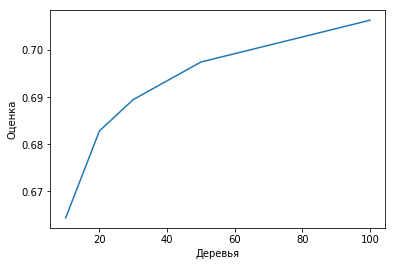

In [26]:
plt.plot([10, 20, 30, 50, 100], scores)
plt.xlabel('Деревья')
plt.ylabel('Оценка')
plt.show()

Как долго проводилась кросс-валидация для градиентного бустинга с 30 деревьями?
    Общее время кроссвалидации с 30-ти деревьями 86 сек.
    Среднее время одного обучения на 30-ти деревьях 2.87 сек.

Какое качество при этом получилось?
    ROC_AUC = 0.6894962060591201

Имеет ли смысл использовать больше 30 деревьев в градиентном бустинге?
    Качество улучшеатся с увеличением количества деревьев.

Что бы вы предложили делать, чтобы ускорить его обучение при увеличении количества деревьев?
    Чтобы ускорить процесс обучения при увеличении количества деревьев можно выделить основные признаки методом главных компонент, можно уменьшить глубину деревьев, увеличить длину шага(learning_rate), обучаться по части выборки.

# Подход 2: логистическая регрессия

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [28]:
scores_reg_scale_NOT = []
for i in [100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    print ('C = {}'.format(str(i)))
    model = LogisticRegression(C=i, random_state=241, n_jobs=-1)
    start_time = datetime.datetime.now()
    model_scores = cross_val_score(model, df_features, y, cv=kf, scoring='roc_auc', n_jobs=-1)
    print ('Затрачено времени:', datetime.datetime.now() - start_time)
    print ('Оценка', model_scores)
    scores_reg_scale_NOT.append(np.mean(model_scores))

C = 100000
Затрачено времени: 0:00:10.601200
Оценка [ 0.51272911  0.51292395  0.50857083  0.51667694  0.51637736]
C = 10000
Затрачено времени: 0:00:10.509800
Оценка [ 0.51272911  0.51292395  0.50857083  0.51667694  0.51637736]
C = 1000
Затрачено времени: 0:00:10.383800
Оценка [ 0.51272911  0.51292395  0.50857083  0.51667694  0.51637736]
C = 100
Затрачено времени: 0:00:12.219000
Оценка [ 0.51272911  0.51292395  0.50857083  0.51667694  0.51637736]
C = 10
Затрачено времени: 0:00:11.864600
Оценка [ 0.51272911  0.51292395  0.50857083  0.51667694  0.51637736]
C = 1
Затрачено времени: 0:00:10.469400
Оценка [ 0.51272911  0.51292395  0.50857083  0.51667694  0.51637736]
C = 0.1
Затрачено времени: 0:00:10.493000
Оценка [ 0.51272911  0.51292395  0.50857083  0.51667694  0.51637736]
C = 0.01
Затрачено времени: 0:00:11.863200
Оценка [ 0.51272911  0.51292395  0.50857083  0.51667694  0.51637736]
C = 0.001
Затрачено времени: 0:00:11.161400
Оценка [ 0.51272911  0.51292395  0.50857083  0.51667694  0.51637

Оцените качество логистической регрессии (sklearn.linear_model.LogisticRegression с L2-регуляризацией) с помощью кросс-валидации по той же схеме, которая использовалась для градиентного бустинга.

Качество без нормализации признаков очень плохое.

In [29]:
scaler = StandardScaler()
scaler.fit(df_features)
scaled_data = scaler.transform(df_features)
scaled_data.shape

(97230, 102)

In [30]:
c_score_scaled ={}

for i in [100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    print ('C = {}'.format(str(i)))
    model = LogisticRegression(C=i, random_state=241, n_jobs=-1)
    start_time = datetime.datetime.now()
    model_scores = cross_val_score(model, scaled_data, y, cv=kf, scoring='roc_auc', n_jobs=-1)
    print ('Затрачено времени:', datetime.datetime.now() - start_time)
    print ('Оценка', model_scores)
    
    c_score_scaled[i] = np.mean(model_scores)

C = 100000
Затрачено времени: 0:00:19.027800
Оценка [ 0.72165733  0.71369457  0.71438594  0.71539407  0.71639938]
C = 10000
Затрачено времени: 0:00:16.797200
Оценка [ 0.72165733  0.71369457  0.71438593  0.71539407  0.71639938]
C = 1000
Затрачено времени: 0:00:16.432200
Оценка [ 0.72165734  0.71369457  0.71438593  0.71539409  0.71639938]
C = 100
Затрачено времени: 0:00:16.419200
Оценка [ 0.72165734  0.71369455  0.7143859   0.71539408  0.71639946]
C = 10
Затрачено времени: 0:00:17.929000
Оценка [ 0.72165702  0.7136947   0.71438623  0.71539423  0.71639952]
C = 1
Затрачено времени: 0:00:16.511200
Оценка [ 0.72165762  0.71369565  0.71438656  0.71539329  0.7163998 ]
C = 0.1
Затрачено времени: 0:00:19.187200
Оценка [ 0.72165841  0.7137031   0.71438941  0.71539496  0.71640454]
C = 0.01
Затрачено времени: 0:00:17.301600
Оценка [ 0.7216634   0.71377395  0.71440813  0.71540233  0.7164595 ]
C = 0.001
Затрачено времени: 0:00:18.244200
Оценка [ 0.72134945  0.71368677  0.71425051  0.71512064  0.71649

In [31]:
for i in c_score_scaled:
    print('Параметр C - {}, средняя оценка - {}'.format(i, c_score_scaled[i]))

Параметр C - 100000, средняя оценка - 0.7163062594192566
Параметр C - 10000, средняя оценка - 0.7163062572998156
Параметр C - 1000, средняя оценка - 0.7163062636530346
Параметр C - 100, средняя оценка - 0.7163062657792337
Параметр C - 10, средняя оценка - 0.7163063399602339
Параметр C - 1, средняя оценка - 0.716306583645544
Параметр C - 0.1, средняя оценка - 0.7163100836533356
Параметр C - 0.01, средняя оценка - 0.716341462186996
Параметр C - 0.001, средняя оценка - 0.7161802463683578
Параметр C - 0.0001, средняя оценка - 0.7112501143920594


In [32]:
print('Максимальная средняя оценка при С =', max(c_score_scaled, key=c_score_scaled.get), 'будет - {}'.format(
    c_score_scaled[max(c_score_scaled, key=c_score_scaled.get)]))

Максимальная средняя оценка при С = 0.01 будет - 0.716341462186996


Качество после нормализации уже более соответсвует ожиданиям.

Наилучший параметр С = 0.01 AUC_ROC = 0.7164009506527343
Логическая регрессия работает быстрее градиентного бустинга

Удаление категориальных признаков

In [33]:
features_to_drop = ['lobby_type', 'r1_hero', 'r2_hero', 'r3_hero', 'r4_hero', 'r5_hero',
                      'd1_hero', 'd2_hero', 'd3_hero', 'd4_hero', 'd5_hero']

In [34]:
df_features_dropped = df_features.drop(features_to_drop, axis=1)

In [35]:
scaler.fit(df_features_dropped)
scaled_data = scaler.transform(df_features_dropped)

In [36]:
scaled_data.shape

(97230, 91)

In [37]:
c_score_scaled ={}

for i in [100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    print ('C = {}'.format(str(i)))
    model = LogisticRegression(C=i, random_state=241, n_jobs=-1)
    start_time = datetime.datetime.now()
    model_scores = cross_val_score(model, scaled_data, y, cv=kf, scoring='roc_auc', n_jobs=-1)
    print ('Затрачено времени:', datetime.datetime.now() - start_time)
    print ('Оценка', model_scores)
    
    c_score_scaled[i] = np.mean(model_scores)

C = 100000
Затрачено времени: 0:00:15.987400
Оценка [ 0.7218107   0.71362952  0.71460894  0.71551026  0.71629323]
C = 10000
Затрачено времени: 0:00:15.962000
Оценка [ 0.72181071  0.71362952  0.71460894  0.71551026  0.71629323]
C = 1000
Затрачено времени: 0:00:17.892000
Оценка [ 0.72181072  0.71362952  0.71460893  0.71551026  0.71629323]
C = 100
Затрачено времени: 0:00:17.441600
Оценка [ 0.72181067  0.71362945  0.71460889  0.71551027  0.71629322]
C = 10
Затрачено времени: 0:00:17.054400
Оценка [ 0.72181043  0.71362965  0.71460893  0.71551033  0.71629306]
C = 1
Затрачено времени: 0:00:15.710400
Оценка [ 0.72181039  0.71363045  0.71460884  0.71551016  0.71629392]
C = 0.1
Затрачено времени: 0:00:15.830800
Оценка [ 0.72181205  0.7136378   0.7146095   0.71551012  0.71629945]
C = 0.01
Затрачено времени: 0:00:15.399600
Оценка [ 0.7218164   0.71370124  0.71462628  0.71551614  0.71634469]
C = 0.001
Затрачено времени: 0:00:14.728000
Оценка [ 0.72152794  0.71360976  0.71445497  0.71521698  0.71636

In [38]:
for i in c_score_scaled:
    print('Параметр C - {}, средняя оценка - {}'.format(i, c_score_scaled[i]))

Параметр C - 100000, средняя оценка - 0.7163705280495243
Параметр C - 10000, средняя оценка - 0.7163705301674704
Параметр C - 1000, средняя оценка - 0.7163705301659756
Параметр C - 100, средняя оценка - 0.7163704962706654
Параметр C - 10, средняя оценка - 0.7163704793048005
Параметр C - 1, средняя оценка - 0.7163707526581122
Параметр C - 0.1, средняя оценка - 0.7163737844721112
Параметр C - 0.01, средняя оценка - 0.7164009506527343
Параметр C - 0.001, средняя оценка - 0.7162355910206267
Параметр C - 0.0001, средняя оценка - 0.7112483906159717


In [39]:
print('Максимальная средняя оценка при С =', max(c_score_scaled, key=c_score_scaled.get), 'будет - {}'.format(
    c_score_scaled[max(c_score_scaled, key=c_score_scaled.get)]))

Максимальная средняя оценка при С = 0.01 будет - 0.7164009506527343


Удаление категориальных признаков не повлияло на качество предсказания. Наилучшее значение показателя AUC_ROC так же достигается при C = 0.01. Получается, что в предыдущей модели эти признаки никак не влияли на результат предсказания, модель смогла распознать этот шум.

Формарование "мешка слов"

In [40]:
heroes_list = ['r1_hero', 'r2_hero', 'r3_hero', 'r4_hero', 'r5_hero',
                   'd1_hero', 'd2_hero', 'd3_hero', 'd4_hero', 'd5_hero']

In [41]:
heroes_count = [len(df_features[i].unique())for i in heroes_list]
print('Уникальных героев = {}'.format(np.max(heroes_count)))

Уникальных героев = 108


В данной игре 108 идентификаторов героев
Всего уникальных id 113. Но т.к. импользуеться Captain's Mode, некоторые герои, которые были недавно добавлены в игру или переделаны, недоступны в этом режиме.

In [42]:
X_pick = np.zeros((df_features.shape[0], 113))

In [44]:
for i, match_id in enumerate(df_features.index):
        for p in range(5):
            X_pick[i, df_features.loc[match_id, 'r%d_hero' % (p + 1)] - 1] = 1
            X_pick[i, df_features.loc[match_id, 'd%d_hero' % (p + 1)] - 1] = -1

In [45]:
x_scaled_tranform = np.concatenate([scaled_data, X_pick], axis=1)

Логистичечкая регрессия на новой выборке с подбором лучшего параметра регуляризации.

In [62]:
c=8

In [ ]:
model = LogisticRegression(C=c, n_jobs=-1)
start_time = datetime.datetime.now()
model_scores = cross_val_score(model, x_scaled_tranform, y, cv=kf, scoring='roc_auc', n_jobs=-1)
print ('Затрачено времени:', datetime.datetime.now() - start_time)
print ('Оценка', model_scores)

In [ ]:
print('Средняя оценка - {}'.format(np.mean(model_scores)))

Какое получилось качество?
    При добавлении "мешка слов" качество стало = 0.7517359674415294,  

Улучшилось ли оно?
    Качество улучшилось. 

Чем вы можете это объяснить?
    Герои - это важные признаки. При правильной обработке они повышают качетво классификации.

### Предсказание вероятностей победы Светлой команды для тестовой выборки с помощью лучшей из изученных моделей

In [49]:
test = pd.read_csv("features_test.csv", index_col='match_id')

In [50]:
X_test = test.drop(features_to_drop, axis=1).fillna(0)

In [51]:
X_test.shape

(17177, 91)

In [52]:
scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [53]:
X_pick = np.zeros((len(test), 113))

In [54]:
for i, match_id in enumerate(test.index):
    for p in range(5):
        X_pick[i, test.loc[match_id, 'r%d_hero' % (p + 1)] - 1] = 1
        X_pick[i, test.loc[match_id, 'd%d_hero' % (p + 1)] - 1] = -1
X_test_good = np.concatenate([X_test, X_pick], axis=1)

In [55]:
X_test_good

array([[-2.5148749 ,  0.47474566, -0.23774298, ...,  0.        ,
         0.        ,  0.        ],
       [-2.51389501, -1.36563036, -1.20791332, ...,  0.        ,
         0.        ,  0.        ],
       [-2.5123772 , -1.36563036, -0.86205735, ...,  0.        ,
         1.        ,  0.        ],
       ..., 
       [ 1.08005567, -1.36563036, -1.17421453, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.08387463,  0.47474566,  1.0765097 , ...,  0.        ,
        -1.        ,  0.        ],
       [ 1.08579655,  0.47474566, -0.0390975 , ...,  0.        ,
         1.        ,  0.        ]])

In [56]:
c=0.01

In [57]:
model = LogisticRegression(C=c)


In [58]:
model.fit(x_scaled_tranform, y)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [59]:
y_test = model.predict_proba(X_test_good)[:, 1]

In [60]:
id_match = test.index
print('match_id, radiant_win')
min_val, max_val = (1, 0)
for i in range(0, len(test)):
    current = y_test[i]
    print(str(id_match[i]) + "," + str(current))
    max_val = current > max_val and current or max_val
    min_val = current < min_val and current or min_val

match_id, radiant_win
6,0.813962683239
7,0.745353092312
10,0.195020465593
13,0.870518832914
16,0.241227121404
18,0.381528788439
19,0.522050224912
24,0.566262178051
33,0.222148203079
37,0.651236006625
41,0.166839494657
42,0.332433471259
55,0.243556051104
60,0.67757018749
62,0.552661355275
63,0.533539947042
64,0.102526339099
71,0.549210208774
72,0.327608811416
83,0.505884101654
85,0.778716062874
89,0.923513184946
92,0.743805546347
100,0.953558598171
102,0.870967386709
108,0.540153150714
111,0.783703729862
126,0.170444835028
130,0.0499126816901
140,0.786677937353
141,0.262776833761
152,0.837216883503
153,0.72756362851
159,0.558838396822
160,0.559962192335
163,0.589612714272
178,0.552401547419
179,0.378026084101
181,0.688021282884
196,0.155470185577
206,0.119865219974
209,0.544503850241
216,0.569824325816
228,0.0787121637581
230,0.419979598751
242,0.709148957218
245,0.170861290123
261,0.499340365753
274,0.470337686938
282,0.733388194369
289,0.513352996121
296,0.101882628483
297,0.600767985

11168,0.812331772335
11173,0.757505509804
11174,0.282686696874
11178,0.477408056431
11183,0.299608706612
11190,0.127885115069
11202,0.174423781139
11210,0.456970873925
11234,0.485124174078
11237,0.862611070049
11240,0.573890323257
11244,0.680378710091
11246,0.74909793293
11249,0.432389886707
11258,0.188215454477
11267,0.138440956446
11278,0.540026360517
11284,0.310737329418
11289,0.464624410556
11309,0.394921635752
11311,0.573625416412
11321,0.538903913209
11335,0.268416628328
11344,0.365650885161
11350,0.32352888956
11356,0.111149737734
11357,0.868300838751
11359,0.622210934282
11361,0.363729527081
11362,0.390983931663
11374,0.188791340113
11376,0.254884850517
11379,0.6608163463
11385,0.550309206175
11391,0.611017176727
11402,0.724712429356
11414,0.213483132603
11422,0.782969591396
11428,0.316258035178
11440,0.368501658923
11450,0.772460582569
11469,0.386522877807
11474,0.64627213356
11476,0.468155638807
11484,0.829430952278
11488,0.508828303241
11489,0.257620491784
11531,0.4728662948

21002,0.312653394923
21003,0.640382677037
21031,0.343517743916
21033,0.289203683526
21037,0.723813379128
21044,0.31774626028
21052,0.407554530472
21056,0.2622007367
21063,0.687473397913
21064,0.28511768557
21076,0.762070679172
21087,0.554129430256
21090,0.163909029915
21092,0.493211112969
21105,0.459846420208
21108,0.35538313423
21111,0.864846395771
21142,0.403215679813
21152,0.546728135866
21166,0.374017348151
21169,0.586679271487
21182,0.332145405077
21213,0.419395902709
21214,0.34585634867
21217,0.128490392097
21223,0.731802337272
21238,0.849842271786
21240,0.828428984747
21255,0.617415695517
21257,0.764180557192
21261,0.710905775693
21268,0.800364834897
21270,0.469660619357
21278,0.271148057825
21284,0.489443064134
21294,0.679384625569
21297,0.409219120924
21298,0.369867748708
21322,0.8124932446
21324,0.524221229124
21328,0.676745340212
21342,0.680925398046
21349,0.555561081707
21353,0.263592863004
21359,0.699243933294
21369,0.611019505134
21370,0.257419810538
21380,0.220657126983


31975,0.626104648666
31978,0.18896040714
31982,0.843139536814
31995,0.907057338507
31996,0.199782381252
32003,0.70515228235
32007,0.425691264581
32017,0.480312316013
32018,0.749553425131
32045,0.726310913897
32059,0.723549492505
32071,0.741038499313
32072,0.310319838068
32073,0.355429233702
32080,0.267347254137
32087,0.506590279652
32088,0.544307185674
32091,0.844435774845
32092,0.443703652348
32094,0.937927794896
32104,0.550988216686
32106,0.611974379954
32124,0.668610555255
32126,0.589665917273
32132,0.477615204132
32133,0.554943528734
32150,0.22612870426
32167,0.780874337577
32171,0.146014735587
32177,0.811003249524
32180,0.900218925472
32183,0.861197330755
32185,0.734731230328
32188,0.216406576118
32190,0.203979827037
32193,0.451268721205
32196,0.41749019325
32203,0.359395287853
32217,0.460005253508
32237,0.141372524069
32255,0.214765613898
32257,0.329910805148
32265,0.772645740885
32273,0.721260062032
32283,0.32113784835
32304,0.809581874458
32330,0.738248658376
32332,0.7977794707

41690,0.513014937535
41696,0.481680734527
41699,0.201440812418
41701,0.487988450799
41713,0.447843632516
41734,0.847368153801
41735,0.244493244873
41740,0.734253798088
41744,0.710478941872
41746,0.0430321610317
41756,0.708860464457
41763,0.15600526784
41771,0.745893389869
41784,0.355142121012
41786,0.328128318578
41796,0.224031822614
41797,0.372316765945
41800,0.878293568606
41802,0.233752232888
41803,0.358711187059
41821,0.149604007688
41825,0.628674314968
41828,0.675952364763
41830,0.62899871357
41837,0.675212379202
41854,0.361750914779
41871,0.550892385941
41878,0.333986785719
41882,0.583459284364
41901,0.106206242721
41902,0.753437026789
41909,0.506624821037
41910,0.517664526042
41917,0.206351526593
41919,0.742137763077
41923,0.823825608795
41932,0.448189929637
41934,0.296099773138
41942,0.382645047149
41951,0.732988838881
41953,0.534609752331
41959,0.29280109595
41964,0.487114411298
41968,0.708578525889
41972,0.682796752903
41978,0.272368262924
41980,0.503624030263
41982,0.3428942

51326,0.577314968835
51334,0.943467299559
51337,0.170980836448
51343,0.704402336148
51351,0.235768790851
51355,0.69552158804
51363,0.434666949011
51369,0.350129956059
51372,0.288264734037
51377,0.508768561031
51379,0.786857833678
51387,0.770827354148
51394,0.0423847774944
51399,0.649071886832
51403,0.714424333286
51407,0.101794071424
51410,0.261393001482
51424,0.891620233108
51434,0.134416209778
51436,0.736166181266
51437,0.118027669618
51439,0.731434986545
51442,0.43321394968
51444,0.80450883481
51470,0.256962927918
51476,0.943369736416
51490,0.320043351459
51493,0.7446637422
51497,0.789417812452
51504,0.384770592225
51509,0.448574969387
51514,0.828541299635
51515,0.345144361956
51516,0.0900454100262
51517,0.558182273185
51525,0.34115258425
51531,0.152134266533
51546,0.57387654365
51553,0.252650725946
51569,0.408616821238
51575,0.299446295274
51578,0.586989280706
51586,0.433187954286
51596,0.897356035477
51610,0.834823982337
51611,0.52892970974
51614,0.527183093783
51615,0.80891080053

60381,0.818443260924
60387,0.365516956907
60392,0.41563283001
60398,0.174816663017
60405,0.724651753133
60406,0.310161066197
60418,0.674671290233
60433,0.489971215615
60442,0.48444293766
60445,0.567377351574
60450,0.494818570581
60456,0.211901779479
60462,0.368695617473
60466,0.36269173117
60473,0.844917695016
60483,0.892426110375
60486,0.315583267956
60488,0.471437848563
60499,0.702629838053
60501,0.497936485377
60505,0.281306786427
60514,0.638641192422
60518,0.723384067127
60519,0.445232194905
60530,0.38226488737
60540,0.363978859027
60548,0.594575786441
60553,0.390198471519
60556,0.866593895697
60558,0.686126311701
60559,0.549284057453
60561,0.259268954043
60575,0.72560683479
60576,0.260805861439
60581,0.236819564593
60585,0.423654830174
60586,0.322853894309
60593,0.547457008555
60594,0.754917245448
60599,0.308815963206
60600,0.29231176597
60615,0.811616113668
60624,0.180853921807
60628,0.759076983386
60629,0.618099217082
60639,0.326121831188
60641,0.726123380164
60644,0.50395537716

72169,0.25607861898
72182,0.710875919447
72196,0.676850855354
72214,0.533400956973
72220,0.46194637872
72224,0.104020462774
72226,0.582396609312
72227,0.282593988373
72228,0.372874866956
72231,0.753630319937
72236,0.425869061243
72243,0.78728897644
72246,0.336462604556
72255,0.884963660173
72263,0.109356826156
72267,0.198074519335
72289,0.304844468759
72294,0.516647102015
72299,0.364776965309
72303,0.789870673629
72307,0.419389029168
72310,0.495239689724
72313,0.458689853355
72317,0.444394035742
72325,0.882399587539
72336,0.690356683638
72362,0.544763851173
72369,0.708407864301
72371,0.832597003826
72372,0.640690830933
72380,0.345787558176
72384,0.398062158903
72390,0.197187293222
72396,0.133986456164
72397,0.363230347349
72400,0.442349588494
72401,0.57769486183
72404,0.211659019612
72406,0.189495866455
72420,0.652380701331
72429,0.237986804837
72443,0.48673818568
72447,0.455111245252
72453,0.935600239815
72458,0.884745394543
72470,0.242326097112
72473,0.278942720932
72474,0.5388332429

82070,0.829916720263
82081,0.420563942451
82087,0.456885892956
82094,0.585070862514
82102,0.525314536643
82105,0.635774701143
82107,0.859722353606
82111,0.43548824671
82113,0.356145956296
82115,0.186340403582
82118,0.472128593171
82121,0.0234658680042
82123,0.715277652397
82130,0.677954170321
82131,0.487365593909
82148,0.702770794819
82154,0.204266014273
82169,0.109819249598
82170,0.413568240206
82171,0.252519195169
82179,0.704372374028
82180,0.694059169993
82187,0.421701400276
82189,0.674232653718
82201,0.38164129361
82227,0.3805005277
82235,0.603785528809
82236,0.572500605744
82252,0.815062886002
82269,0.501716897054
82271,0.671584904261
82276,0.750033552076
82282,0.247176470488
82290,0.623282339893
82295,0.24104163513
82296,0.371010411293
82298,0.287312697549
82300,0.925006859173
82304,0.753982561217
82316,0.833790629644
82324,0.727491466048
82325,0.849240197806
82327,0.841043350955
82353,0.756258705074
82362,0.0780872725539
82391,0.741339286342
82395,0.52901879866
82401,0.635002493

92210,0.74452274721
92213,0.964636925166
92217,0.331433917215
92218,0.460517884812
92220,0.516065269618
92225,0.170258620367
92233,0.783986105127
92251,0.603915851116
92261,0.533824670209
92262,0.861844036009
92279,0.694888902954
92294,0.19809038354
92316,0.213364365145
92322,0.594205300096
92334,0.28157218212
92339,0.359577177329
92353,0.249017943746
92360,0.671916424933
92362,0.521523262046
92363,0.110893611629
92368,0.229110511329
92383,0.378547738498
92385,0.501953677793
92390,0.505638421529
92401,0.150100675607
92404,0.739206436177
92410,0.0822066758541
92415,0.683613684167
92416,0.661475631484
92422,0.109853694724
92433,0.623235213981
92439,0.493979575467
92448,0.736483802524
92456,0.532798838135
92460,0.768682964521
92463,0.666480947236
92464,0.601986403938
92466,0.237440553689
92468,0.813851077299
92472,0.806164699652
92476,0.85203249828
92478,0.526417496252
92490,0.551299599073
92495,0.175000445908
92508,0.448349229732
92509,0.0800379743757
92513,0.136429374786
92516,0.6648405

101715,0.551236687148
101719,0.360675719452
101729,0.721509092627
101731,0.808366626613
101732,0.228279274145
101734,0.132144158159
101741,0.422707037432
101747,0.689140110163
101753,0.768911047377
101769,0.307451345772
101770,0.405166945528
101772,0.450739157374
101778,0.703954345718
101793,0.674552891304
101795,0.581688652148
101796,0.775921391821
101797,0.724117471605
101800,0.345153615637
101817,0.696893520481
101829,0.514531101059
101834,0.418653864612
101837,0.830772703662
101840,0.194015886645
101848,0.254175171796
101849,0.485633098101
101860,0.55603796044
101861,0.114775131866
101863,0.195639821752
101874,0.821000101734
101880,0.776773316211
101897,0.494298985774
101906,0.710956412494
101917,0.366365733982
101931,0.266592060987
101933,0.781709525262
101965,0.515151393486
101973,0.0879193233259
101977,0.370354433294
101982,0.49932303005
101984,0.380665499177
101986,0.579861192547
101991,0.409454249699
101997,0.406313640989
102002,0.606324082382
102010,0.4900001273
102021,0.6216

110827,0.375999710316
110834,0.639613459891
110840,0.102272127314
110847,0.761319606819
110850,0.429106326754
110857,0.692775899181
110864,0.213527296151
110881,0.478493855123
110884,0.938155667005
110896,0.379174024655
110902,0.271690193787
110907,0.346655140912
110908,0.809559317395
110909,0.426558374962
110913,0.306988217173
110925,0.918106860934
110926,0.440826017143
110929,0.691807202208
110933,0.773943119822
110944,0.771158440891
110971,0.386833769
110976,0.331936588825
110978,0.570264314569
110979,0.695195212947
110980,0.225461829536
110981,0.268381111236
110982,0.71509694285
110988,0.271993360059
110989,0.676113056775
110991,0.677726053829
110993,0.408645812948
110996,0.869473755934
111008,0.344150556456
111011,0.632124288014
111023,0.919479759579
111028,0.777571319714
111032,0.79877680439
111045,0.313235144979
111051,0.324948796534
111065,0.105147893194
111080,0.393764800992
111094,0.923569899257
111140,0.814203918748
111143,0.673870327996
111144,0.398032594358
111147,0.765571

In [61]:
print('Min: ' + str(min_val))
print('Max: ' + str(max_val))

Min: 0.00844259618217
Max: 0.995983177401
